<a href="https://colab.research.google.com/github/ariG23498/GrokkingDeepLearning/blob/master/MNIST_weight_visualization_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Tensorflow and Keras

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [30]:
print(tf.__version__)

2.1.0


In [0]:
from tensorflow import keras

## Connect to G-Drive

In [32]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Datasets/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Datasets


In [33]:
%ls

mnist_test.csv  mnist_train.csv


In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
df_train = pd.read_csv('mnist_train.csv')

In [36]:
df_train.tail()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
59995,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59999,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train = df_train.loc[:,'1x1':].values
y_train = df_train['label'].values

In [0]:
goal_preds = np.zeros((60000,10))
for i in range(len(y_train)):
    goal_preds[i][y_train[i]] = 1

In [39]:
print('Shape of X_train is {shape}'.format(shape = X_train.shape))
print('Shape of y_train is {shape}'.format(shape = y_train.shape))
print('Shape of goal_preds is {shape}'.format(shape = goal_preds.shape))

Shape of X_train is (60000, 784)
Shape of y_train is (60000,)
Shape of goal_preds is (60000, 10)


In [0]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=10,input_shape = (784,),activation='softmax'))

In [54]:
model.compile(optimizer='sgd',loss='mean_squared_error',metrics=['accuracy'])
model.fit(X_train,goal_preds,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0647 - accuracy: 0.6754
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0642 - accuracy: 0.6776
Epoch 3/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0630 - accuracy: 0.6838
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0621 - accuracy: 0.6881
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0620 - accuracy: 0.6889


In [65]:
len(model.get_weights())

2

In [0]:
first_weight = model.get_weights()[0]
second_weight = model.get_weights()[1]

In [67]:
first_weight.shape

(784, 10)

In [69]:
second_weight.shape

(10,)

In [0]:
def visual(value):
    '''
    takes in value of the class
    ouputs the corresponding weights
    as images
    '''
    assert(0<=value<=9)
    im = first_weight[:,value].reshape((28,28))
    plt.imshow(im)
    plt.show()

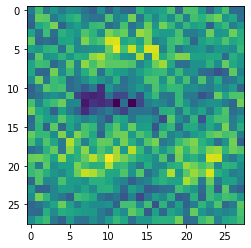

In [77]:
visual(2)